# MM1

In [19]:
def mm1_queue_calculator(lambda_rate, mu_rate, drop_out_rate):
    # Step 1: Calculate the Gateway Utilization (p)
    p = (lambda_rate / mu_rate) * (1 - drop_out_rate)

    # Step 2: Calculate Resource Utilization (U)
    U = p  # since U = p in this case

    # Step 3: Calculate Mean Number of Customers in the System (E[n])
    if p < 1:  # To avoid division by zero if p = 1
        E_n = p / (1 - p)
    else:
        E_n = float('inf')  # Infinite customers in the system (queue is full)

    # Step 4: Calculate Response Time (E[r])
    if lambda_rate != 0:  # To avoid division by zero
        E_r = (1 / mu_rate) / (1 - p)
    else:
        E_r = float('inf')  # No customers arriving

    # Step 5: Calculate Throughput (Throughput)
    throughput = lambda_rate  # Throughput is just the arrival rate

    # Step 6: Calculate Mean Waiting Time (E[w])
    if mu_rate != 0:  # To avoid division by zero
        E_w = E_r - (1 / mu_rate)
    else:
        E_w = 0

    # Step 7: Calculate Mean Number of Customers in the Queue (E[nq])
    E_nq = E_n - p

    # Return all results
    return {
        'Gateway Utilization (p)': p,
        'Mean # of customers in the system (E[n])': E_n,
        'Response Time (E[r])': E_r,
        'Mean Waiting Time (E[w])': E_w,
        'Mean # of customers in the queue (E[nq])': E_nq
    }



In [21]:
lambda_rate1 = 10
mu_rate1 = 5    # Service rate (customers per hour)


drop_out_rate = 0.2  # Dropout rate

results1 = mm1_queue_calculator(lambda_rate1, mu_rate1, drop_out_rate)


# Print the results
print(mu_rate1)
print("{:<40} {:<20}".format("Metric", "Value"))
print("-" * 60)
for key, value in results1.items():
    print(f"{key:<40} {value:.6f}")



5
Metric                                   Value               
------------------------------------------------------------
Gateway Utilization (p)                  1.600000
Mean # of customers in the system (E[n]) inf
Response Time (E[r])                     -0.333333
Mean Waiting Time (E[w])                 -0.533333
Mean # of customers in the queue (E[nq]) inf


# Run lamda_rate from 0 to 50

In [ ]:
pip install matplotlib

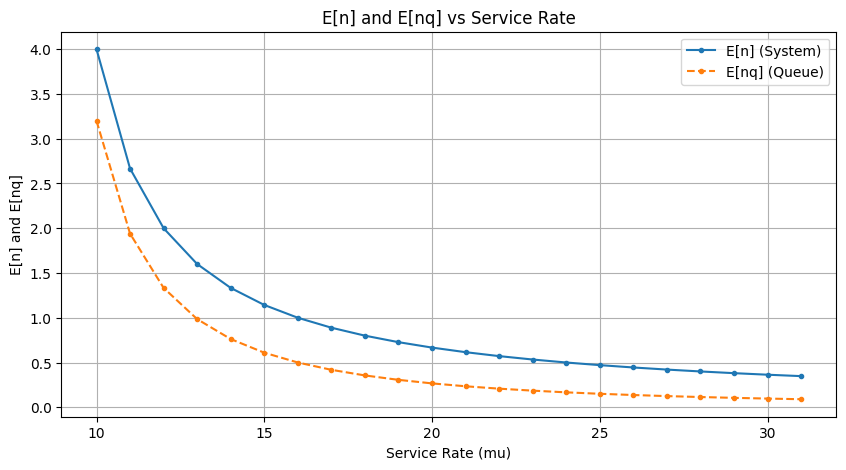

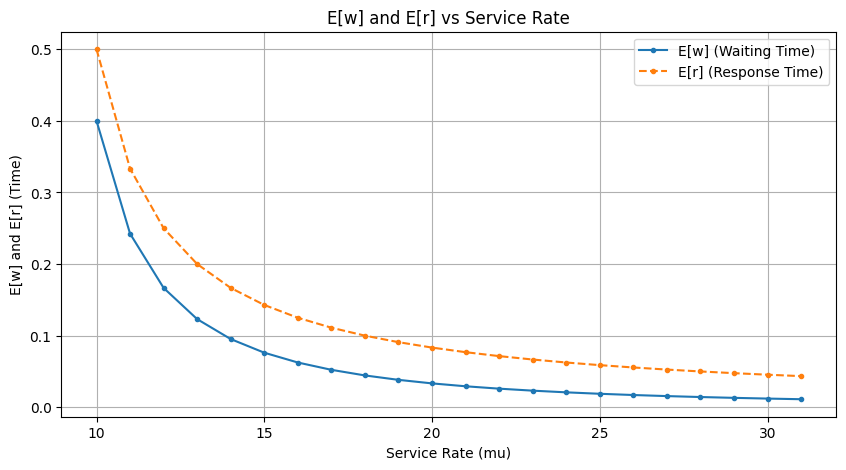

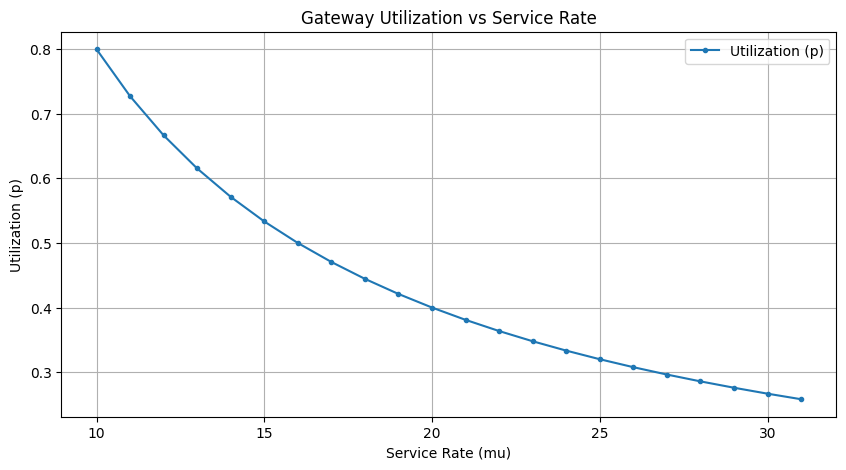

In [34]:
mu_rates = range(10, 32)  # Service rates (customers per hour)
drop_out_rate = 0.2       # Dropout rate

lambda_rate = 10          # Arrival rate (customers per hour)
E_n_values = []           # Mean # of customers in the system
E_nq_values = []          # Mean # of customers in the queue
E_w_values = []           # Mean waiting time
E_r_values = []           # Response time
p_values = []             # Gateway utilization

# Calculate metrics for each mu_rate
for mu_rate in mu_rates:
    try:
        results = mm1_queue_calculator(lambda_rate, mu_rate, drop_out_rate)
        E_n_values.append(results['Mean # of customers in the system (E[n])'])
        E_nq_values.append(results['Mean # of customers in the queue (E[nq])'])
        E_w_values.append(results['Mean Waiting Time (E[w])'])
        E_r_values.append(results['Response Time (E[r])'])
        p_values.append(results['Gateway Utilization (p)'])
    except ValueError as e:
        print(f"Skipped mu_rate={mu_rate}: {e}")

import matplotlib.pyplot as plt

# Plot E[n] and E[nq] vs Service Rate (mu_rate)
plt.figure(figsize=(10, 5))
plt.plot(mu_rates, E_n_values, marker='.', label="E[n] (System)")
plt.plot(mu_rates, E_nq_values, marker='.', label="E[nq] (Queue)", linestyle='--')
plt.xlabel("Service Rate (mu)")
plt.ylabel("E[n] and E[nq]")
plt.title("E[n] and E[nq] vs Service Rate")
plt.legend()
plt.grid(True)
plt.show()

# Plot E[w] and E[r] vs Service Rate (mu_rate)
plt.figure(figsize=(10, 5))
plt.plot(mu_rates, E_w_values, marker='.', label="E[w] (Waiting Time)")
plt.plot(mu_rates, E_r_values, marker='.', label="E[r] (Response Time)", linestyle='--')
plt.xlabel("Service Rate (mu)")
plt.ylabel("E[w] and E[r] (Time)")
plt.title("E[w] and E[r] vs Service Rate")
plt.legend()
plt.grid(True)
plt.show()

# Plot Gateway Utilization (p) vs Service Rate (mu_rate)
plt.figure(figsize=(10, 5))
plt.plot(mu_rates, p_values, marker='.', label="Utilization (p)")
plt.xlabel("Service Rate (mu)")
plt.ylabel("Utilization (p)")
plt.title("Gateway Utilization vs Service Rate")
plt.legend()
plt.grid(True)
plt.show()


# MMC calculator

In [36]:
import math

In [37]:
def generate_lambda(arrival_rate, dropout_rate):
    lambda_to_router = arrival_rate*(1-dropout_rate)
    lambda_to_cus_dep = (1/3)*lambda_to_router
    lambda_to_tech_dep = (2/5)*lambda_to_router
    lambda_to_sales_dep = (31/75)*lambda_to_router

    return lambda_to_cus_dep, lambda_to_tech_dep, lambda_to_sales_dep

def mmc_queue_calculator(lambda_rate, mu_rate, c):
    rho = lambda_rate / (c * mu_rate)
    def erlang_c(c, rho):
        numerator = (c * rho) ** c / math.factorial(c) * 1 / (1 - rho)
        denominator = sum((c * rho) ** k / math.factorial(k) for k in range(c)) + numerator
        return numerator / denominator

    C_c_rho = erlang_c(c, rho)
    # Mean Number of Customers in the System (E[n])
    E_n = (rho * C_c_rho) / (1 - rho) + c * rho

    # Response Time (E[r])
    E_r = (1/mu_rate)*(1+(C_c_rho/(c*(1-rho))))

    # Mean Waiting Time (E[w])
    E_w = C_c_rho / (c*mu_rate*(1-rho))

    #Mean # of customer in the queue = p * l * (1 - p)
    E_nq = rho*C_c_rho*(1-rho)
    # Return all results
    return {
        'Gateway Utilization (p)': rho,
        'Probability of customer forced to join the queue (C(c, ρ))': C_c_rho,
        'Mean # of customers in the system (E[n])': E_n,
        'Response Time (E[r])': E_r,
        'Mean Waiting Time (E[w])': E_w,
        'Mean # of customers in the queue (E[nq])': E_nq

    }


In [ ]:
arrival_rate = 10
dropout_rate = 0.2
lambda_to_cus_dep , lambda_to_tech_dep, lambda_to_sales_dep =  generate_lambda(arrival_rate, dropout_rate)

service_rate_dep = 20
c = 3


results_cus_dep = mmc_queue_calculator(lambda_to_cus_dep, service_rate_dep, c)
results_tech_dep = mmc_queue_calculator(lambda_to_tech_dep, service_rate_dep, c)
results_sales_dep = mmc_queue_calculator(lambda_to_sales_dep, service_rate_dep, c)

print("Customer Dept:")
# Print the results to 4 decimal places
print("{:<60} {:<20}".format("Metric", "Value"))
print("-" * 60)
for key, value in results_cus_dep.items():
    print(f"{key:<60} {value:.6f}")

print("Technical Dept:")
print("{:<60} {:<20}".format("Metric", "Value"))
print("-" * 60)
for key, value in results_tech_dep.items():
    print(f"{key:<60} {value:.6f}")


print("sales and billing Dept:")
print("{:<60} {:<20}".format("Metric", "Value"))
print("-" * 60)
for key, value in results_sales_dep.items():
    print(f"{key:<60} {value:.6f}")

Customer Dept:
Metric                                                       Value               
------------------------------------------------------------
Gateway Utilization (p)                                      0.022222
Probability of customer forced to join the queue (C(c, ρ))   0.000047
Mean # of customers in the system (E[n])                     0.066668
Response Time (E[r])                                         0.050001
Mean Waiting Time (E[w])                                     0.000001
Mean # of customers in the queue (E[nq])                     0.000001
Technical Dept:
Metric                                                       Value               
------------------------------------------------------------
Gateway Utilization (p)                                      0.026667
Probability of customer forced to join the queue (C(c, ρ))   0.000081
Mean # of customers in the system (E[n])                     0.080002
Response Time (E[r])                                 

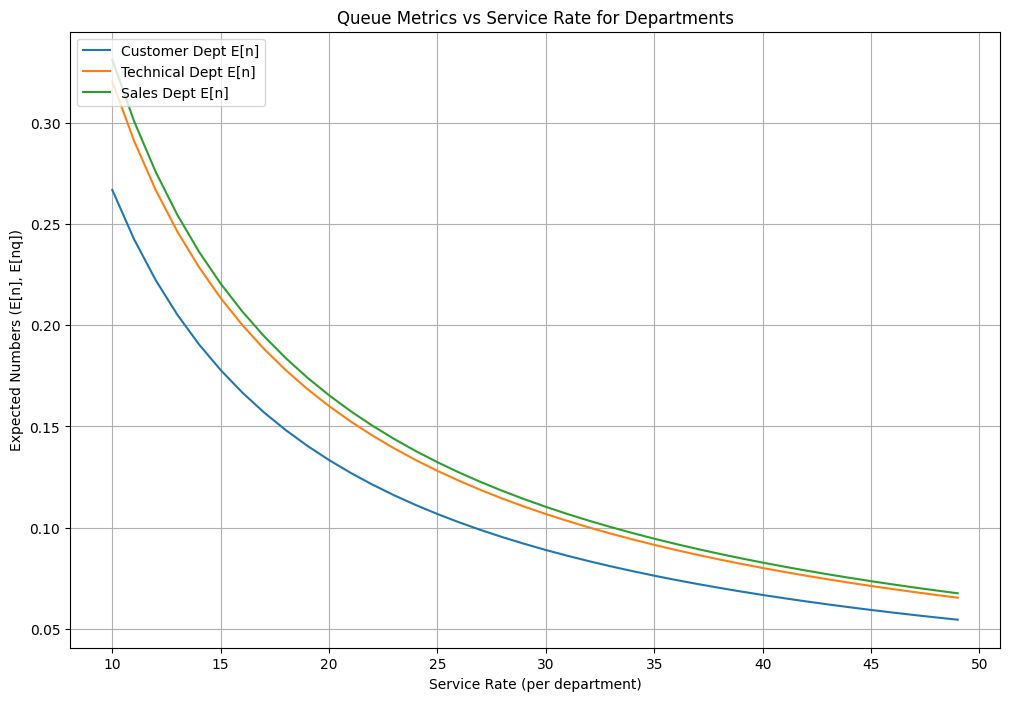

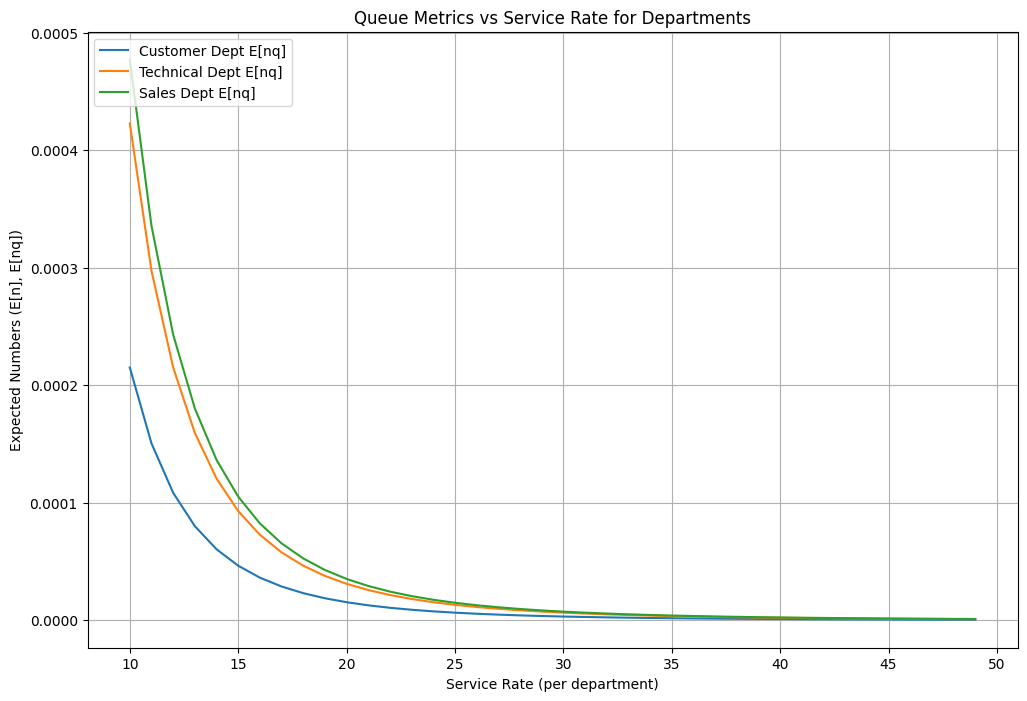

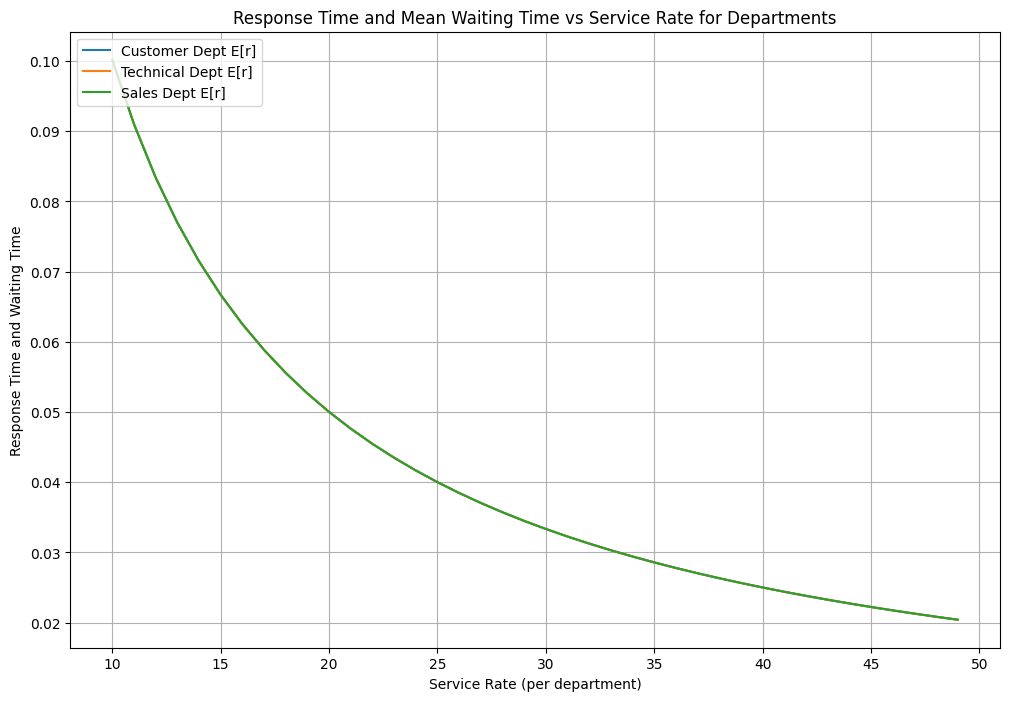

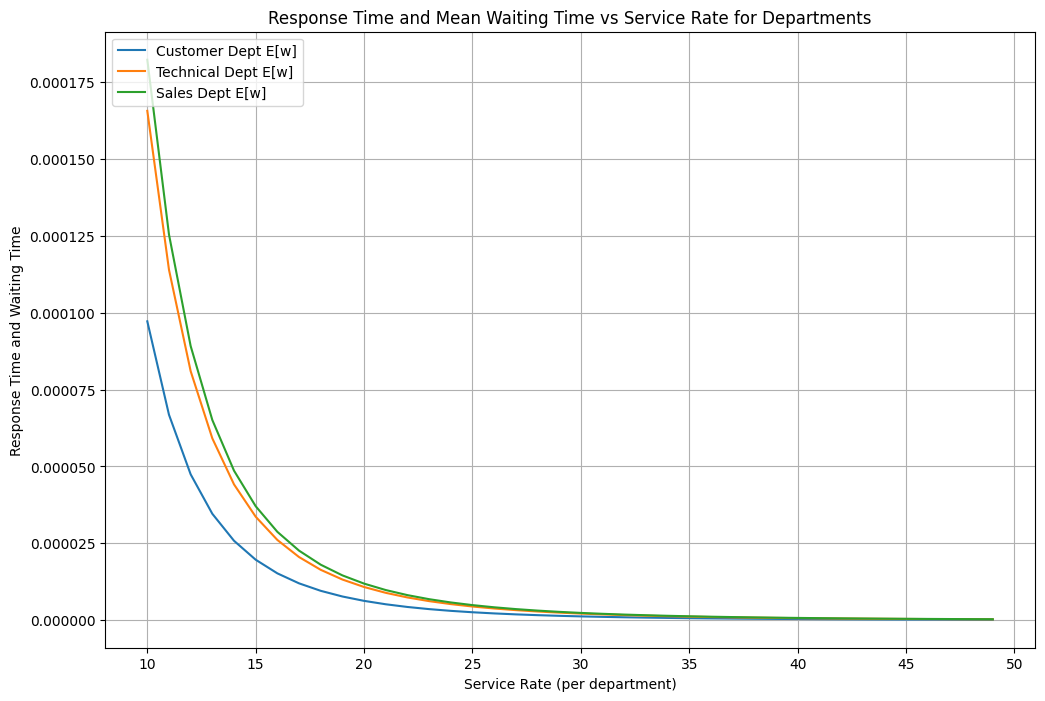

In [50]:
# Parameters
dropout_rate = 0.2
service_rate_deps = range(10, 50)
c = 3
arrival_rate = 10  # Extend range for higher loads

# Initialize results storage
results = {
    "Customer Dept":    {"E[n]": [], "E[nq]": [], "E[r]": [], "E[w]": []},
    "Technical Dept":   {"E[n]": [], "E[nq]": [], "E[r]": [], "E[w]": []},
    "Sales Dept":       {"E[n]": [], "E[nq]": [], "E[r]": [], "E[w]": []}
}

# Run calculations
for service_rate_dep in service_rate_deps:
    try:
        lambda_to_depts = generate_lambda(arrival_rate, dropout_rate)
        
        for i, dept in enumerate(["Customer Dept", "Technical Dept", "Sales Dept"]):
            result = mmc_queue_calculator(lambda_to_depts[i], service_rate_dep, c)
            results[dept]["E[n]"].append(result["Mean # of customers in the system (E[n])"])
            results[dept]["E[nq]"].append(result["Mean # of customers in the queue (E[nq])"])
            results[dept]["E[r]"].append(result["Response Time (E[r])"])
            results[dept]["E[w]"].append(result["Mean Waiting Time (E[w])"])
    except Exception as e:
        print(f"Error for service_rate_dep={service_rate_dep}: {e}")
        # Append NaN for error cases to preserve the index in plots
        for dept in results.keys():
            results[dept]["E[n]"].append(None)
            results[dept]["E[nq]"].append(None)
            results[dept]["E[r]"].append(None)
            results[dept]["E[w]"].append(None)

# Plot E[n] and E[nq]
plt.figure(figsize=(12, 8))
for dept in results.keys():
    plt.plot(service_rate_deps, results[dept]["E[n]"], label=f"{dept} E[n]", linestyle='-', marker='')
    # plt.plot(service_rate_deps, results[dept]["E[nq]"], label=f"{dept} E[nq]", linestyle='-', marker='')

plt.xlabel("Service Rate (per department)")
plt.ylabel("Expected Numbers (E[n], E[nq])")
plt.title("Queue Metrics vs Service Rate for Departments")
plt.legend(loc="upper left")
plt.grid()
plt.show()

##############################################
plt.figure(figsize=(12, 8))
for dept in results.keys():
    # plt.plot(service_rate_deps, results[dept]["E[n]"], label=f"{dept} E[n]", linestyle='--', marker='')
    plt.plot(service_rate_deps, results[dept]["E[nq]"], label=f"{dept} E[nq]", linestyle='-', marker='')

plt.xlabel("Service Rate (per department)")
plt.ylabel("Expected Numbers (E[n], E[nq])")
plt.title("Queue Metrics vs Service Rate for Departments")
plt.legend(loc="upper left")
plt.grid()
plt.show()


##############################################

# Plot E[r]
plt.figure(figsize=(12, 8))
for dept in results.keys():
    plt.plot(service_rate_deps, results[dept]["E[r]"], label=f"{dept} E[r]", linestyle='-', marker='')

plt.xlabel("Service Rate (per department)")
plt.ylabel("Response Time and Waiting Time")
plt.title("Response Time and Mean Waiting Time vs Service Rate for Departments")
plt.legend(loc="upper left")
plt.grid()
plt.show()

# Plot E[r] for each department in a separate chart
# for dept in results.keys():
#     plt.figure(figsize=(10, 6))
#     plt.plot(service_rate_deps, results[dept]["E[r]"], label=f"{dept} E[r]", linestyle='--', marker='o')
#     # Uncomment the following line if you also want to plot E[w]
#     # plt.plot(service_rate_deps, results[dept]["E[w]"], label=f"{dept} E[w]", linestyle='-', marker='x')
#     plt.xlabel("Service Rate (per department)")
#     plt.ylabel("Response Time (E[r])")
#     plt.title(f"Response Time (E[r]) vs Service Rate for {dept}")
#     plt.legend(loc="upper left")
#     plt.grid()
#     plt.show()


##############################################
# Plot E[w]
plt.figure(figsize=(12, 8))
for dept in results.keys():
    # plt.plot(service_rate_deps, results[dept]["E[r]"], label=f"{dept} E[r]", linestyle='--', marker='')
    plt.plot(service_rate_deps, results[dept]["E[w]"], label=f"{dept} E[w]", linestyle='-', marker='')

plt.xlabel("Service Rate (per department)")
plt.ylabel("Response Time and Waiting Time")
plt.title("Response Time and Mean Waiting Time vs Service Rate for Departments")
plt.legend(loc="upper left")
plt.grid()
plt.show()